In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
%matplotlib inline

C:\Users\ozlud\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
mnist_train = pd.read_csv("C:/Users/ozlud/Ozlu DB/Dropbox/Dropbox Ozlu/mnist_train.csv")
mnist_test = pd.read_csv("C:/Users/ozlud/Ozlu DB/Dropbox/Dropbox Ozlu/mnist_test.csv")

In [5]:
mnist_train = mnist_train.sample(frac=0.5,random_state=41).reset_index().drop("index",1)
mnist_test = mnist_test.sample(frac=1,random_state=41).reset_index().drop("index",1)

C:\Users\ozlud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Users\ozlud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
mnist_train_X = mnist_train.drop("label",1)
mnist_train_y = mnist_train["label"]

C:\Users\ozlud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
mnist_test_X = mnist_test.drop("label",1)
mnist_test_y = mnist_test["label"]

C:\Users\ozlud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Frequency Distribution of the Examples across Digits')

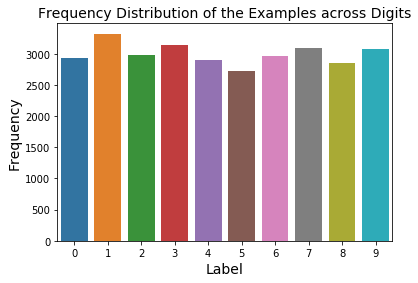

In [16]:
ax = sns.countplot(x="label", data=mnist_train)
plt.xlabel('Label',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Frequency Distribution of the Examples across Digits',fontsize=14)

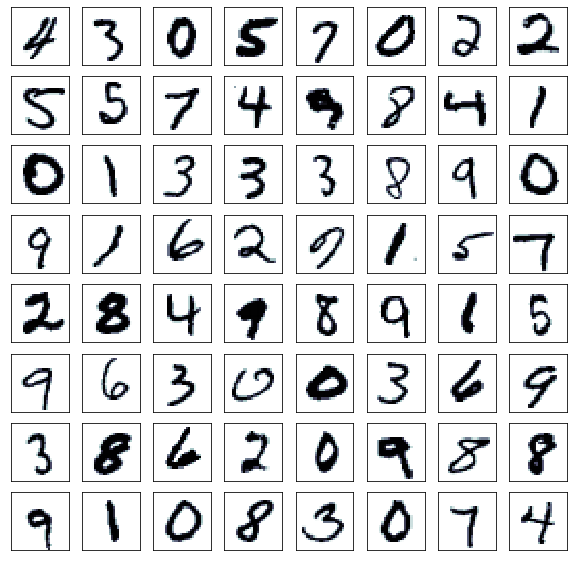

In [27]:
plt.figure(figsize=(10,10))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = mnist_test_X.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

In [69]:
d0 = mnist_train

In [70]:
l = d0['label']
d = d0.drop('label',axis = 1)
print(d.shape)
print(l.shape)

(30000, 784)
(30000,)


In [71]:
labels = l.head(10000)
data = d.head(10000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (10000, 784)


In [72]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(10000, 784)


In [73]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [74]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals = (782,783))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors =",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors = (2, 784)


In [75]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("resultant new data points shape ",vectors.shape, "X", sample_data.shape)

resultant new data points shape  (2, 784) X (10000, 784)


In [76]:
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       5.103278       3.056086    5.0
1      -4.691781       5.104560    9.0
2       2.333510       0.415999    8.0
3      -9.859842      -7.100183    9.0
4      -0.154400       7.872165    1.0


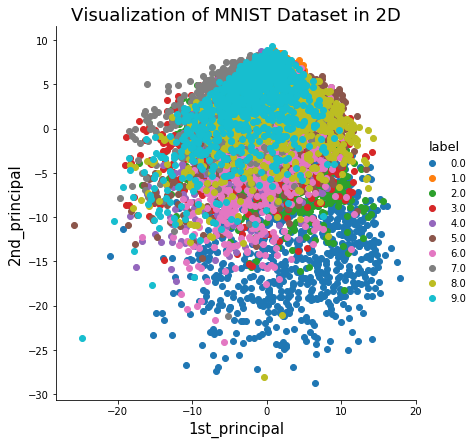

In [98]:
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title('Visualization of MNIST Dataset in 2D', fontsize=18)
plt.show()